## PCA在人脸识别中的应用：特征脸

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Labeled Face in the Wild  
[lfw](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html)

In [6]:
from sklearn.datasets import fetch_lfw_people

In [46]:
faces = fetch_lfw_people(min_faces_per_person=10, resize=0.4) 
#一个相同的人，至少有10张ta的照片。注意有些人可能只有一张照片，于是这些人就不被纳入faces
faces

{'data': array([[ 90.333336  ,  85.        , 128.        , ...,  33.        ,
          38.        ,  41.        ],
        [ 64.        , 108.        , 162.        , ...,   0.33333334,
           3.        ,   5.3333335 ],
        [107.        , 106.        , 121.333336  , ..., 149.33333   ,
         142.        , 157.33333   ],
        ...,
        [ 24.        ,  51.333332  ,  67.        , ...,  73.333336  ,
          76.333336  ,  74.        ],
        [ 84.        ,  84.666664  ,  82.        , ..., 206.33333   ,
         192.        , 190.33333   ],
        [ 56.666668  ,  68.333336  ,  91.666664  , ...,  20.333334  ,
          19.333334  ,  14.333333  ]], dtype=float32),
 'images': array([[[ 90.333336  ,  85.        , 128.        , ...,  97.666664  ,
           98.333336  , 102.        ],
         [ 77.666664  , 108.333336  , 156.66667   , ...,  97.666664  ,
          100.333336  , 104.        ],
         [ 95.333336  , 137.66667   , 178.        , ...,  99.333336  ,
          102

In [47]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [50]:
faces.data.shape #一共4k人脸，每张脸有1850个特征

(4324, 1850)

In [51]:
faces.images.shape #用二维形式表示特征：50*37 = 1850

(4324, 50, 37)

### 随机选取人脸并绘制

In [52]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]

In [53]:
example_faces = X[:36, :]
example_faces.shape

(36, 1850)

In [54]:
def plot_faces(faces):
    fig, axes = plt.subplots(6,6, figsize = (10,10),
                            subplot_kw = {'xticks':[], 'yticks':[]},
                            gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(50,37), cmap = 'bone')
    plt.show()

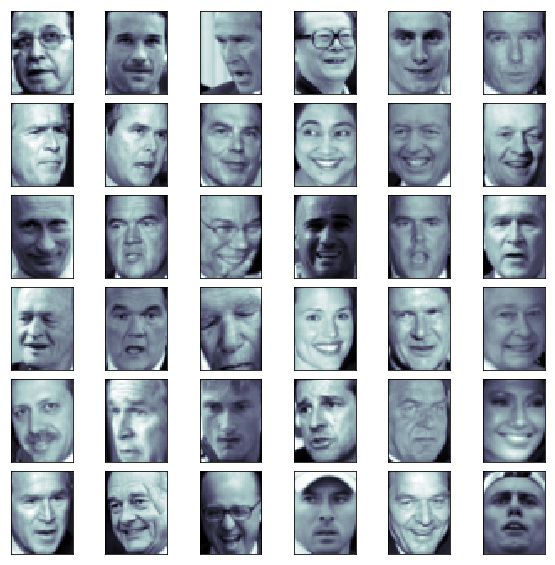

In [55]:
plot_faces(example_faces)

In [56]:
faces.target_names

array(['Abdullah Gul', 'Adrien Brody', 'Alejandro Toledo', 'Alvaro Uribe',
       'Amelie Mauresmo', 'Andre Agassi', 'Andy Roddick',
       'Angelina Jolie', 'Ann Veneman', 'Anna Kournikova',
       'Ari Fleischer', 'Ariel Sharon', 'Arnold Schwarzenegger',
       'Atal Bihari Vajpayee', 'Bill Clinton', 'Bill Gates',
       'Bill McBride', 'Bill Simon', 'Britney Spears', 'Carlos Menem',
       'Carlos Moya', 'Catherine Zeta-Jones', 'Charles Moose',
       'Colin Powell', 'Condoleezza Rice', 'David Beckham',
       'David Nalbandian', 'Dick Cheney', 'Dominique de Villepin',
       'Donald Rumsfeld', 'Edmund Stoiber', 'Eduardo Duhalde',
       'Fidel Castro', 'George HW Bush', 'George Robertson',
       'George W Bush', 'Gerhard Schroeder', 'Gloria Macapagal Arroyo',
       'Gonzalo Sanchez de Lozada', 'Gordon Brown', 'Gray Davis',
       'Guillermo Coria', 'Halle Berry', 'Hamid Karzai', 'Hans Blix',
       'Harrison Ford', 'Hillary Clinton', 'Howard Dean', 'Hu Jintao',
       'Hugo Chave

In [57]:
len(faces.target_names) #有158个不同的人

158

### Eigenface：特征脸

In [59]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized') #奇异值分解SVD
#使用随机的方式求解PCA，因为现在数据库比较大。注意这里没有注明需要多少主成分，说明我们需要计算全部主成分（轴）

In [60]:
%time pca.fit(X)

CPU times: user 15.7 s, sys: 302 ms, total: 16 s
Wall time: 2.74 s


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [62]:
pca.fit(X)
pca.components_.shape #pca.components_中每一行就是特征脸

(1850, 1850)

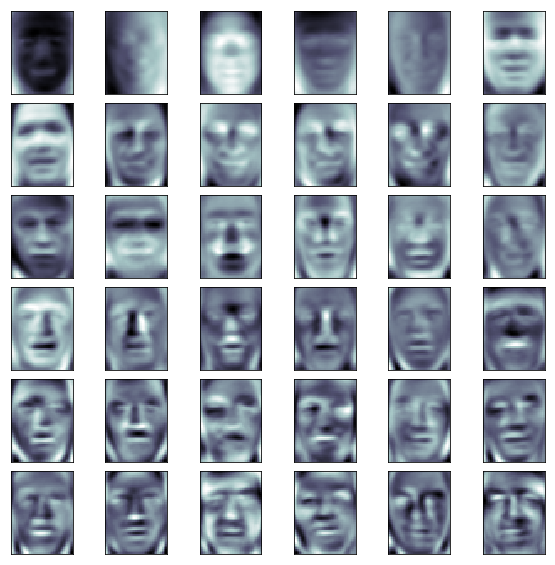

In [65]:
plot_faces(pca.components_[:36,:])
#排在前面的越模糊, 例如第一张：看出 人脸大概是这样椭圆的轮廓

### sklearn.decomposition.PCA 初始化：
下面我们主要基于sklearn.decomposition.PCA来讲解如何使用scikit-learn进行PCA降维。PCA类基本不需要调参，一般来说，我们只需要指定我们需要降维到的维度，或者我们希望降维后的主成分的方差和占原始维度所有特征方差和的比例阈值就可以了。

现在我们对sklearn.decomposition.PCA的主要参数做一个介绍：

1）n_components：这个参数可以帮我们指定希望PCA降维后的特征维度数目。最常用的做法是直接指定降维到的维度数目，此时n_components是一个大于等于1的整数。当然，我们也可以指定主成分的方差和所占的最小比例阈值，让PCA类自己去根据样本特征方差来决定降维到的维度数，此时n_components是一个（0，1]之间的数。当然，我们还可以将参数设置为"mle", 此时PCA类会用MLE算法根据特征的方差分布情况自己去选择一定数量的主成分特征来降维。我们也可以用默认值，即不输入n_components，此时n_components=min(样本数，特征数)。

2）whiten ：判断是否进行白化。所谓白化，就是对降维后的数据的每个特征进行归一化，让方差都为1.对于PCA降维本身来说，一般不需要白化。如果你PCA降维后有后续的数据处理动作，可以考虑白化。默认值是False，即不进行白化。

3）svd_solver：即指定奇异值分解SVD的方法，由于特征分解是奇异值分解SVD的一个特例，一般的PCA库都是基于SVD实现的。有4个可以选择的值：{‘auto’, ‘full’, ‘arpack’, ‘randomized’}。**randomized一般适用于数据量大，数据维度多同时主成分数目比例又较低的PCA降维，它使用了一些加快SVD的随机算法。** full则是传统意义上的SVD，使用了scipy库对应的实现。arpack和randomized的适用场景类似，区别是randomized使用的是scikit-learn自己的SVD实现，而arpack直接使用了scipy库的sparse SVD实现。默认是auto，即PCA类会自己去在前面讲到的三种算法里面去权衡，选择一个合适的SVD算法来降维。一般来说，使用默认值就够了。

除了这些输入参数外，有两个PCA类的成员值得关注。第一个是explained_variance_，它代表降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分。第二个是explained_variance_ratio_，它代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分。